Below is the code used to make the visuals found in the report. I have used the values obtained from the experiments and have rounded them to 4 significant digits to match the benchmark C-TRUS study.

In [1]:
#libraries used to make visuals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visuals for Experiment 1

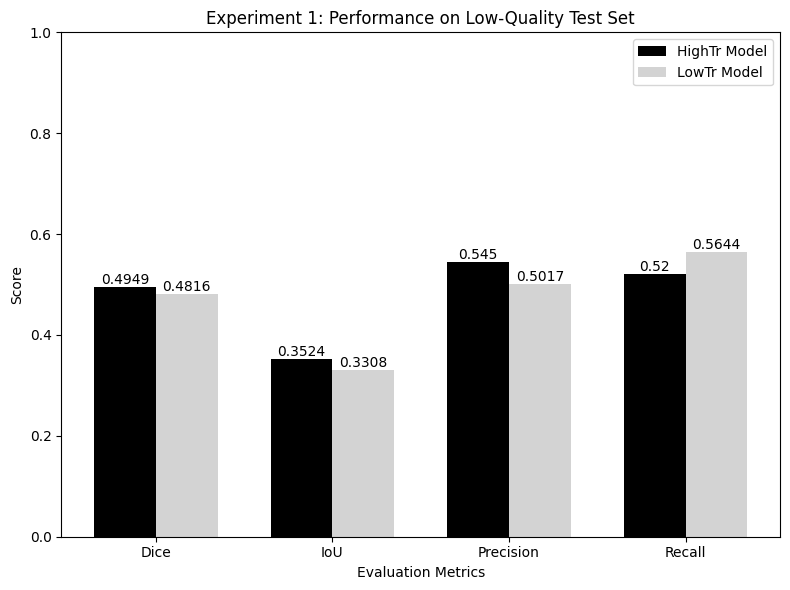

In [3]:
# Metric values taken from the results in Experiment 1
metrics = ["Dice", "IoU", "Precision", "Recall"]
high_trained = [0.4949, 0.3524, 0.5450, 0.5200]
low_trained = [0.4816, 0.3308, 0.5017, 0.5644]

# Bar positions
x = np.arange(len(metrics)) # so four positions
width = 0.35  # width of the bar

fig, ax = plt.subplots(figsize=(8,6))

# Ploting bars - using x position so that the two bars are split to the left and right
bars1 = ax.bar(x - width/2, high_trained, width, label="HighTr Model",color="black")
bars2 = ax.bar(x + width/2, low_trained, width, label="LowTr Model",color="lightgray")

# Formatting the graph
ax.set_ylabel("Score")
ax.set_xlabel("Evaluation Metrics")
ax.set_title("Experiment 1: Performance on Low-Quality Test Set")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1) #setting this axis for all visualizations to make it easier to make comparisons and not make misleading visualizations
ax.legend()

# Adding value labels on the bars (4 significant digits to match C-TRUS benchmark study)
def add_labels(bars): # making a function so that I dont have to repeat for both bars
    for bar in bars:
        height = bar.get_height() #the bars value from y-axis (which is its score)
        ax.annotate(f"{height:.4g}",
            xy=(bar.get_x() + bar.get_width()/2, height),
            ha='center', va='bottom')

# Apply the labels to both bars and it should annotate the results on top of each bar
add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

# Visuals for Experiment 2

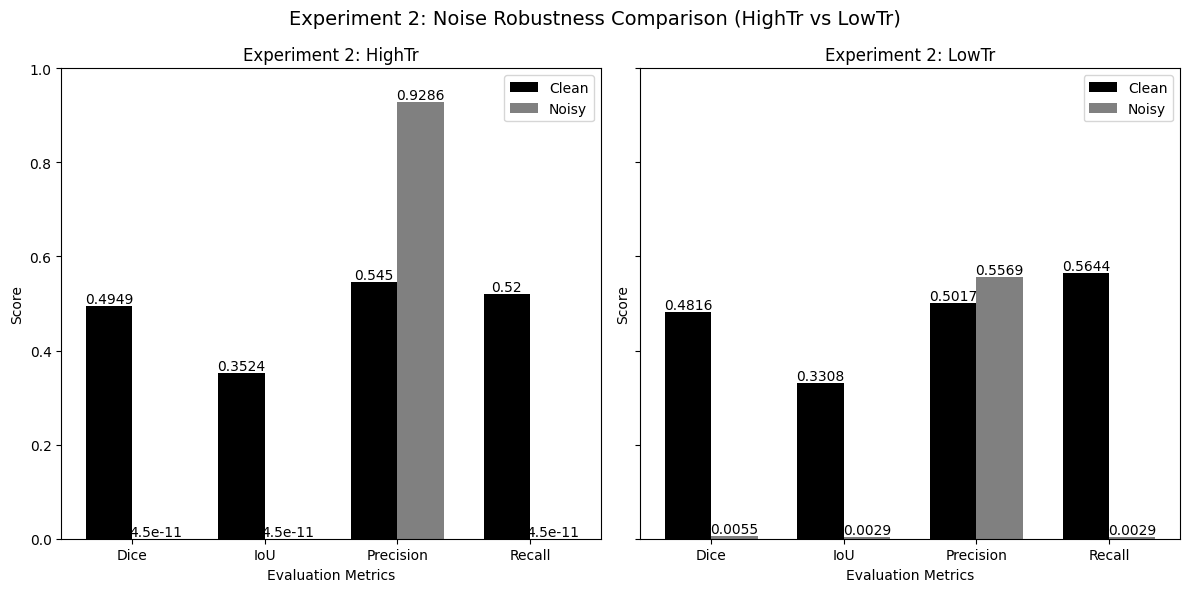

In [10]:
# Metric values taken from the results in Experiment 2
metrics = ["Dice", "IoU", "Precision", "Recall"]

# HighTr results
hightr_noisy = [4.50e-11, 4.50e-11, 0.9286, 4.50e-11] # practically zero values under noisy
hightr_clean = [0.4949, 0.3524, 0.5450, 0.5200]

# LowTr results
lowtr_noisy = [0.0055, 0.0029, 0.5569, 0.0029]
lowtr_clean = [0.4816, 0.3308, 0.5017, 0.5644]

# Reuse the same helper function for adding labels from previous figure
def add_labels(ax, bars): #need to add ax since there is two plots
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.4g}",
            xy=(bar.get_x() + bar.get_width()/2, height),
            ha='center', va='bottom')
# Same setup as previous table but incorporating another plot altogether for sidebyside comparison
x = np.arange(len(metrics))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Same case here but each bar is for the clean vs noisy comparison
# HighTr subplot
rects1 = axes[0].bar(x - width/2, hightr_clean, width, label="Clean", color="black")
rects2 = axes[0].bar(x + width/2, hightr_noisy, width, label="Noisy", color="grey")

# Formating the plot
axes[0].set_title("Experiment 2: HighTr")
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].set_xlabel("Evaluation Metrics")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 1) #keeping y-axis standard for all
axes[0].legend()
# Adding labels
add_labels(axes[0], rects1)
add_labels(axes[0], rects2)

# LowTr subplot
rects3 = axes[1].bar(x - width/2, lowtr_clean, width, label="Clean", color="black")
rects4 = axes[1].bar(x + width/2, lowtr_noisy, width, label="Noisy", color="grey")

# Formating for the plot
axes[1].set_title("Experiment 2: LowTr")
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics)
axes[1].set_xlabel("Evaluation Metrics")
axes[1].set_ylabel("Score")
axes[1].set_ylim(0, 1)
axes[1].legend()
# Labels again
add_labels(axes[1], rects3)
add_labels(axes[1], rects4)

fig.suptitle("Experiment 2: Noise Robustness Comparison (HighTr vs LowTr)", fontsize=14)
plt.tight_layout()
plt.show()


# Visuals for Experiment 3

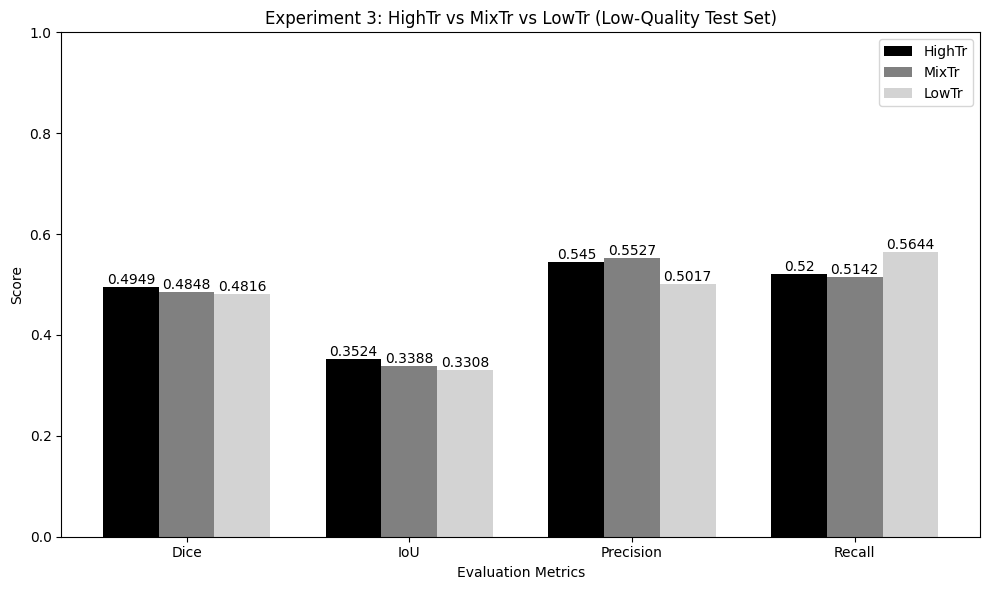

In [16]:
# Metric values taken from the results in Experiment 3
metrics = ["Dice", "IoU", "Precision", "Recall"]

# Means to 4 significant digits (from your reports)
hightr = [0.4949, 0.3524, 0.5450, 0.5200]
lowtr  = [0.4816, 0.3308, 0.5017, 0.5644]
mixtr  = [0.4848, 0.3388, 0.5527, 0.5142]

# Label function (same as experiment 1 since it is on single axis)
def add_labels(bars): #need to add ax since there is two plots
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.4g}",
            xy=(bar.get_x() + bar.get_width()/2, height),
            ha='center', va='bottom')

x = np.arange(len(metrics))
width = 0.25 # had to make thinner to fit third bar

fig, ax = plt.subplots(figsize=(10,6))

# Grayscale colorway for consistency - keeping it consistent with earlier figure for Experiment 1
bars_high = ax.bar(x - width, hightr, width, label="HighTr", color="black")
bars_mix  = ax.bar(x,         mixtr,  width, label="MixTr",  color="gray")
bars_low  = ax.bar(x + width, lowtr,  width, label="LowTr",  color="lightgray")

# Formating the plot
ax.set_ylabel("Score")
ax.set_xlabel("Evaluation Metrics")
ax.set_title("Experiment 3: HighTr vs MixTr vs LowTr (Low-Quality Test Set)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Adding the labels
add_labels(bars_high)
add_labels(bars_mix)
add_labels(bars_low)

plt.tight_layout()
plt.show()


# Visuals for Experiment 4

I have split the metrics looking at Dice and IoU together than at precition and recall together this way it is not too cluttered when making the graphs and I can split up the results section based on the visuals.

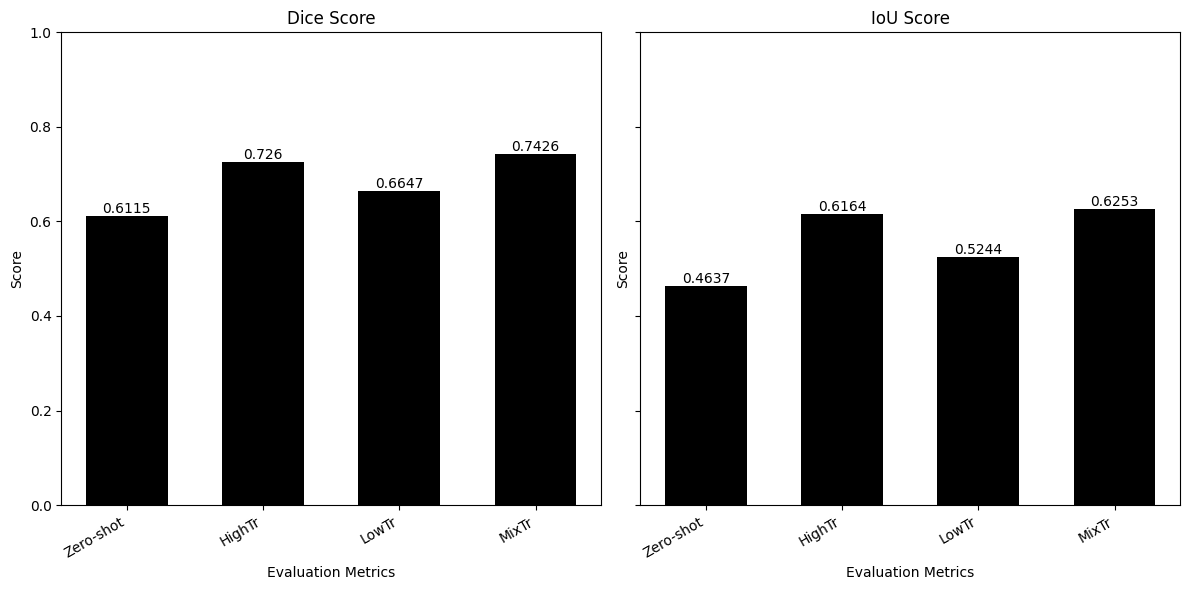

In [14]:
# Metric results from Experiment 4
models = ["Zero-shot", "HighTr", "LowTr", "MixTr"]
dice_scores = [0.6115, 0.7260, 0.6647, 0.7426]
iou_scores = [0.4637, 0.6164, 0.5244, 0.6253]

# Since I need two plots, I will use the function from figure for Experiment 2
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.4g}",
            xy=(bar.get_x() + bar.get_width()/2, height),
            ha='center', va='bottom')

x = np.arange(len(models))
width = 0.6  # changed the bar width to fill in the space better since it is only for single bars

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Dice score
bars1 = axes[0].bar(x, dice_scores, width, label="Dice", color="black")
axes[0].set_title("Dice Score")
axes[0].set_ylabel("Score")
axes[0].set_xlabel("Evaluation Metrics")
axes[0].set_xticks(x)
axes[0].set_ylim(0, 1)
axes[0].set_xticklabels(models, rotation=30, ha="right")

# Adding labels
add_labels(axes[0], bars1)

# IoU score - same approach as Dice
bars2 = axes[1].bar(x, iou_scores, width, label="IoU", color="black")
axes[1].set_title("IoU Score")
axes[1].set_ylabel("Score")
axes[1].set_xticks(x)
axes[1].set_xlabel("Evaluation Metrics")
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels(models, rotation=30, ha="right")
add_labels(axes[1], bars2)

plt.tight_layout()
plt.show()


In [4]:
# Data collected from the benchmark C-TRUS paper for the tested architectures combined with the results from my experiments on the fine-tuned models (I rounded to 4 digits to match the C-TRUS benchmark results)
data = {
    "Model": [
        "Mask R-CNN", "U-Netnn", "DeepLabV3+", "HiFormer",
        "TMU-Net", "SegNext", "MedSAM (HighTr)", "MedSAM (LowTr)", "MedSAM (MixTr)"
    ],
    "Dice": [0.7249, 0.5195, 0.5012, 0.4596, 0.4201, 0.4046, 0.7260, 0.6647, 0.7426],
    "Precision": [0.7835, 0.5119, 0.5110, 0.4518, 0.5341, 0.5581, 0.7645, 0.7178, 0.7851],
    "Recall": [0.7166, 0.6247, 0.5884, 0.5810, 0.4294, 0.3725, 0.7283, 0.6689, 0.7391],
}

# creating a dataframe to get a table that I can use for comparison in results section
df = pd.DataFrame(data)
df



,Model,Dice,Precision,Recall
0,Mask R-CNN,0.7249,0.7835,0.7166
1,U-Netnn,0.5195,0.5119,0.6247
2,DeepLabV3+,0.5012,0.5110,0.5884
3,HiFormer,0.4596,0.4518,0.5810
4,TMU-Net,0.4201,0.5341,0.4294
5,SegNext,0.4046,0.5581,0.3725
6,MedSAM (HighTr),0.7260,0.7645,0.7283
7,MedSAM (LowTr),0.6647,0.7178,0.6689
8,MedSAM (MixTr),0.7426,0.7851,0.7391
